# **Import Library**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
import matplotlib.gridspec as gridspec


In [ ]:
#Reading the dataset
data_train = pd.read_csv("application_train.csv")
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


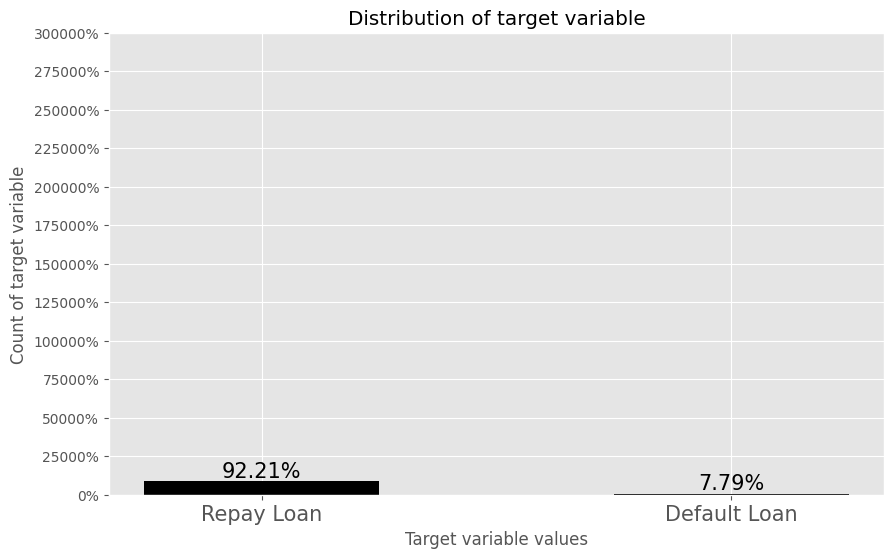

In [ ]:
target = data_train['TARGET'].value_counts()
x = target.index.tolist()
y = target.values
total = y.sum() #total observation

#Matplotlib code
fig = plt.figure()
ax = fig.add_subplot(111)
bar_plot = ax.bar(x, y, width=0.5, color='black')
ax.set_xticks(x)
ax.set_xlabel('Target variable values')
ax.set_xticklabels(['Repay Loan','Default Loan'], rotation=0, fontsize=15)

ax.set_ylim(ymin=0, ymax=300000)
ax.set_ylabel('Count of target variable')
ax.set_yticks(np.arange(0, 325000, 25000))

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)

for rect in bar_plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%.2f' % ((height/total)*100) + "%", ha='center', va='bottom', fontsize=15)

plt.title('Distribution of target variable')
plt.show()

In [ ]:
corr_vars = data_train.corr()['TARGET'].sort_values()
positif = corr_vars[corr_vars > 0].sort_values(ascending=False).drop('TARGET')[:10]
negatif = corr_vars[corr_vars < 0].sort_values(ascending=True)[:10]

<ipython-input-9-6fed80e9cd13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_vars = data_train.corr()['TARGET'].sort_values()


In [ ]:
#call positif corr
positif

DAYS_BIRTH                     0.091807
DAYS_ID_PUBLISH                0.072557
REGION_RATING_CLIENT_W_CITY    0.071166
REGION_RATING_CLIENT           0.069947
DAYS_LAST_PHONE_CHANGE         0.066693
DEF_30_CNT_SOCIAL_CIRCLE       0.055293
REG_CITY_NOT_WORK_CITY         0.052466
DAYS_REGISTRATION              0.052318
DEF_60_CNT_SOCIAL_CIRCLE       0.048467
REG_CITY_NOT_LIVE_CITY         0.038758
Name: TARGET, dtype: float64

In [ ]:
#call negatif corr
negatif

EXT_SOURCE_3                 -0.195988
EXT_SOURCE_2                 -0.170661
EXT_SOURCE_1                 -0.162566
AMT_GOODS_PRICE              -0.050480
AMT_CREDIT                   -0.043201
DAYS_EMPLOYED                -0.034957
FLAG_PHONE                   -0.034243
FLOORSMIN_AVG                -0.032316
FLOORSMIN_MEDI               -0.032307
REGION_POPULATION_RELATIVE   -0.031621
Name: TARGET, dtype: float64

# **Columns with missing values**

In [ ]:
cols = len(data_train.isnull().sum()[data_train.isnull().sum() > 0])
tot_cols = data_train.shape[1] - 1
print("{} columns out of total {} columns have missing values".format(cols, tot_cols))

107 columns out of total 121 columns have missing values


In [ ]:
miss_prcnt = data_train.isnull().sum()/data_train.shape[0] * 100
high_missing_values = miss_prcnt[miss_prcnt > 50]
high_missing_values_index = high_missing_values.index.tolist()
print("{} columns have more than 50% missing values".format(len(high_missing_values_index)))
print("Top 10 columns with highest proportion of missing values:")
high_missing_values.sort_values(ascending=False)[:10]

34 columns have more than 50% missing values
Top 10 columns with highest proportion of missing values:


COMMONAREA_MODE             69.696657
COMMONAREA_AVG              69.696657
COMMONAREA_MEDI             69.696657
NONLIVINGAPARTMENTS_MEDI    69.335534
NONLIVINGAPARTMENTS_AVG     69.335534
NONLIVINGAPARTMENTS_MODE    69.335534
FONDKAPREMONT_MODE          68.520429
LIVINGAPARTMENTS_MEDI       68.355345
LIVINGAPARTMENTS_AVG        68.355345
LIVINGAPARTMENTS_MODE       68.355345
dtype: float64

In [ ]:
#correlation
corr = data_train.corr()['TARGET'].sort_values()

#corr missing columns
corr_miss = corr.reindex(high_missing_values_index).sort_values()
missing_cols_to_be_dropped = corr_miss.index.difference(corr_miss[(corr_miss > 0.02) | (corr_miss < -0.02)].index).tolist()
print("Number of columns that are to be dropped: {}".format(len(missing_cols_to_be_dropped)))

<ipython-input-15-80790586cae8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_train.corr()['TARGET'].sort_values()


Number of columns that are to be dropped: 23


# **Exploring AMT columns**

In [ ]:
pd.options.display.float_format = '{:.2f}'.format #Used to avoid scientific notation
data_train[["AMT_INCOME_TOTAL", "AMT_ANNUITY", "AMT_CREDIT", "AMT_GOODS_PRICE"]].describe()

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE
count,9692.00,9692.00,9692.00,9685.00
mean,167626.20,27100.23,601399.71,541031.09
std,94666.57,14419.82,404023.81,371497.92
min,25650.00,2596.50,45000.00,45000.00
25%,112500.00,16434.00,270000.00,238500.00
50%,144000.00,24970.50,512392.50,450000.00
75%,202500.00,34671.38,810000.00,684000.00
max,1935000.00,135936.00,2961000.00,2961000.00


<ipython-input-17-f90c5e208dcc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train["AMT_CREDIT"], color = 'black', ax = ax1)


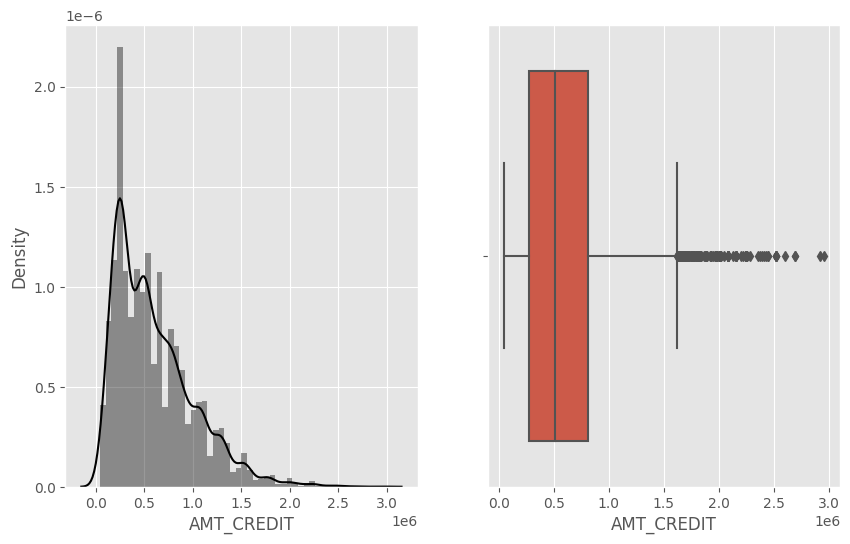

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(data_train["AMT_CREDIT"], color = 'black', ax = ax1)
sns.boxplot(x=data_train["AMT_CREDIT"], ax = ax2)
plt.show()

<ipython-input-21-d2dc188ad924>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train[col], color = 'black', ax = axes_l[axes_count])
<ipython-input-21-d2dc188ad924>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train[col], color = 'black', ax = axes_l[axes_count])
<ipython-input

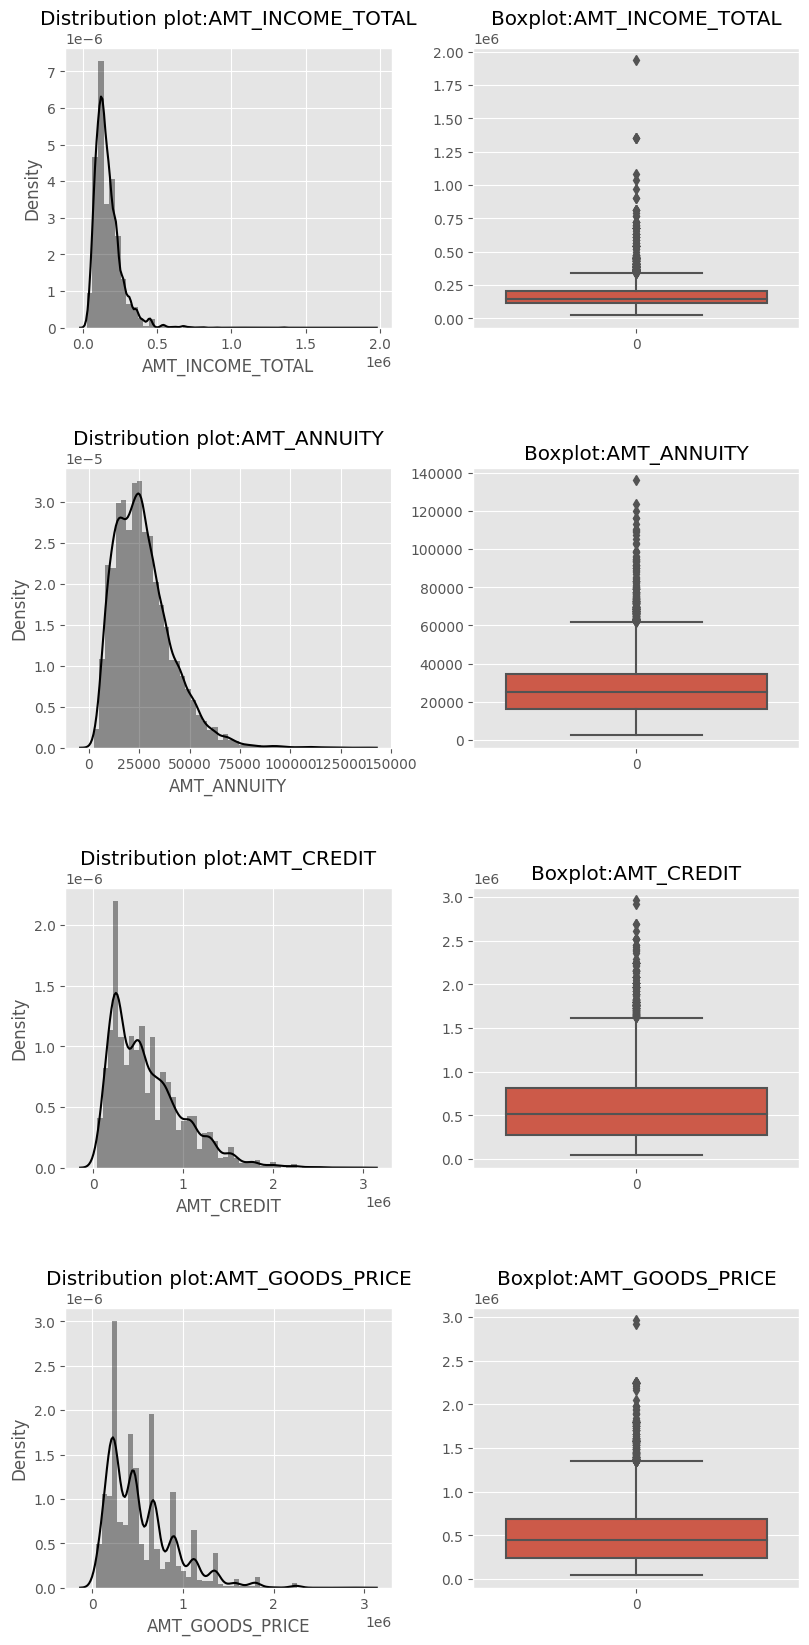

In [ ]:
g = gridspec.GridSpec(4, 4)
g.update(wspace=0.25, hspace=0.5)
plt.figure(figsize = (20,20))
axes_l = []
numeric_cols = ["AMT_INCOME_TOTAL", "AMT_ANNUITY", "AMT_CREDIT", "AMT_GOODS_PRICE"]
row_index = 0
col_index = 0
axes_count = 0
for i, col in enumerate(numeric_cols):
    #Plotting distribution plot 
    row_index = i
    axes_l.append(plt.subplot(g[row_index, col_index]))
    if data_train[col].isnull().sum() == 0:
        sns.distplot(data_train[col], color = 'black', ax = axes_l[axes_count])
    else:
        sns.distplot(data_train[col].dropna(), color = 'black', ax = axes_l[axes_count])
    plt.title('Distribution plot:'+col)
              
    axes_count+=1
    col_index+=1

    #Plotting boxplot
    axes_l.append(plt.subplot(g[row_index, col_index]))
    if data_train[col].isnull().sum() == 0:
        sns.boxplot(data_train[col], ax = axes_l[axes_count])
    else:
        sns.boxplot(data_train[col].dropna(), ax = axes_l[axes_count])
    plt.title('Boxplot:'+col)    
              
    axes_count += 1
    col_index = 0

# axes_l
plt.show()

In [ ]:
data_train[['AMT_GOODS_PRICE', 'AMT_CREDIT']].corr()

,AMT_GOODS_PRICE,AMT_CREDIT
AMT_GOODS_PRICE,1.00,0.99
AMT_CREDIT,0.99,1.00


In [ ]:
data_train[['AMT_GOODS_PRICE', 'AMT_CREDIT']].isnull().sum()

AMT_GOODS_PRICE    7
AMT_CREDIT         0
dtype: int64

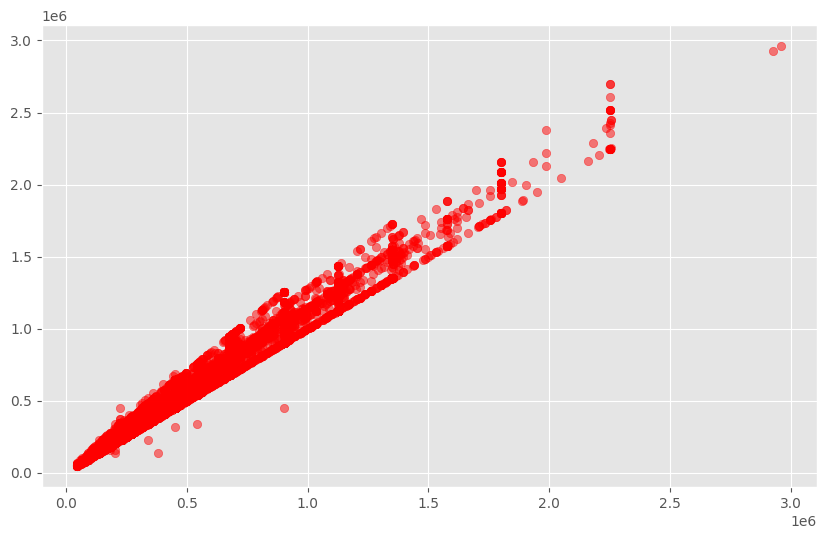

In [ ]:
plt.scatter(x = data_train['AMT_GOODS_PRICE'], y = data_train['AMT_CREDIT'], color = 'red', alpha=0.5)
plt.show()

# **Inspecting age variable**

In [ ]:
data_train["AGE"] = data_train["DAYS_BIRTH"].abs()/365
data_train["AGE"].describe()

count   9691.00
mean      43.92
std       11.90
min       21.11
25%       33.98
50%       43.24
75%       53.71
max       68.93
Name: AGE, dtype: float64

<ipython-input-31-b1f917b002ff>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train["AGE"], color = 'purple', bins=20, kde=False, norm_hist=False)


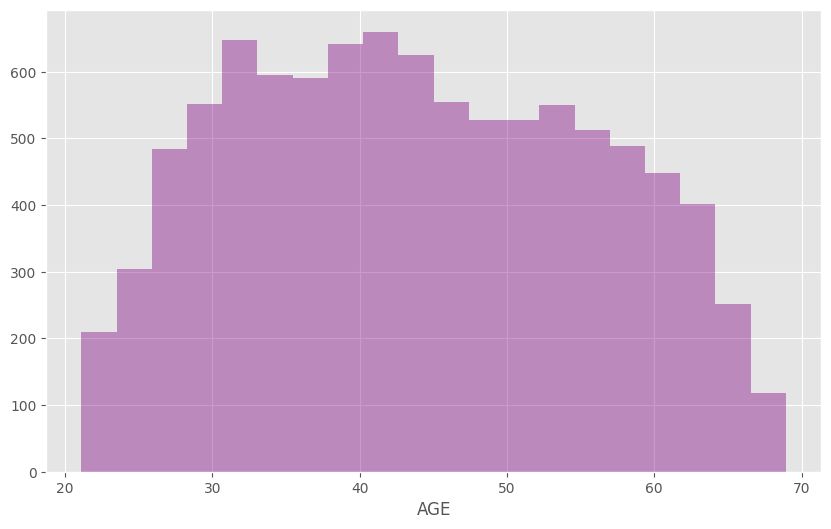

In [ ]:
#Plotting age distribution
fig, ax = plt.subplots()
sns.distplot(data_train["AGE"], color = 'purple', bins=20, kde=False, norm_hist=False)
plt.show()

[]

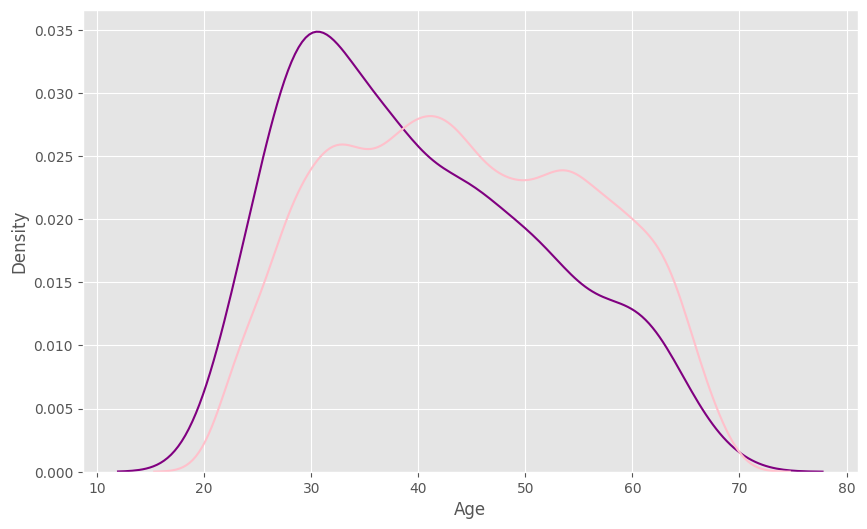

In [ ]:
sns.kdeplot(data_train[data_train["TARGET"]==1]["AGE"], color = 'Purple', label = 'target == 1')
sns.kdeplot(data_train[data_train["TARGET"]==0]["AGE"], color = 'pink', label = 'target == 0')
plt.xlabel('Age')
plt.ylabel('Density')
plt.plot()

# **Days_ columns**

In [ ]:
days_cols = []
days_cols = [col for col in data_train.columns if col.find("DAYS")!=-1]
data_train[days_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,9691.00,9691.00,9691.00,9691.00,9691.00
mean,-16029.07,62808.81,-4987.79,-2982.69,-959.33
std,4342.68,140461.49,3542.63,1514.71,826.28
min,-25160.00,-15632.00,-20981.00,-6228.00,-3882.00
25%,-19605.00,-2822.50,-7483.00,-4297.00,-1558.00
50%,-15782.00,-1229.00,-4482.00,-3229.00,-750.00
75%,-12401.00,-293.00,-1999.50,-1700.50,-261.00
max,-7705.00,365243.00,0.00,0.00,0.00


In [ ]:
data_train[data_train["DAYS_EMPLOYED"] > 0]["DAYS_EMPLOYED"].shape

(1719,)

In [ ]:
#Creating the binary column and setting the value = 1 wherevr the value of days_employed will be 365243
data_train["DAYS_EMPLOYED_ANOMALY"] = 0
anomalous_indices = data_train[data_train["DAYS_EMPLOYED"] > 0]["DAYS_EMPLOYED"].index
data_train.loc[anomalous_indices, "DAYS_EMPLOYED_ANOMALY"] = 1

#Replacing anomalies with 0
data_train["DAYS_EMPLOYED"].replace(365243, 0, inplace=True)
data_train[["DAYS_EMPLOYED", "DAYS_EMPLOYED_ANOMALY"]][:15]

,DAYS_EMPLOYED,DAYS_EMPLOYED_ANOMALY
0,-637.00,0
1,-1188.00,0
2,-225.00,0
3,-3039.00,0
4,-3038.00,0
5,-1588.00,0
6,-3130.00,0
7,-449.00,0
8,0.00,1
9,-2019.00,0


# **Investigating EXTSOURCE columns**

In [ ]:
data_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,4230.00,9665.00,7766.00
mean,0.50,0.52,0.51
std,0.21,0.19,0.20
min,0.02,0.00,0.00
25%,0.33,0.39,0.37
50%,0.51,0.57,0.54
75%,0.67,0.66,0.67
max,0.93,0.85,0.89


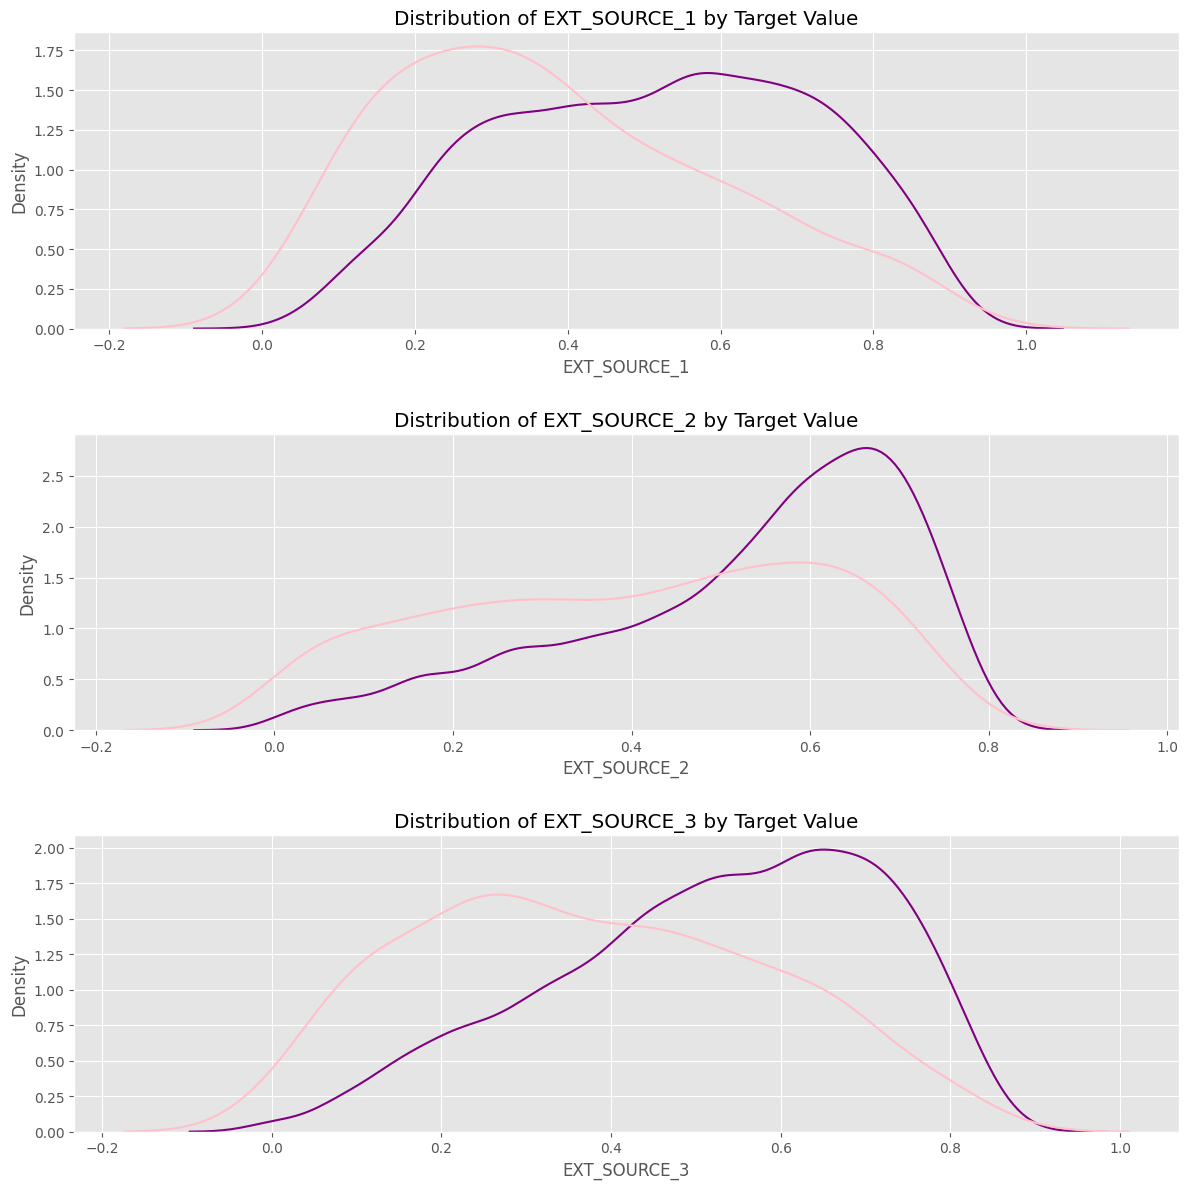

In [39]:
# Plotting the distributions for target = 1 and target = 0

plt.figure(figsize = (12, 12))

# iterate through the new features
for i, feature in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, feature], label = 'target == 0', color = 'purple')
    # plot loans that were not repaid
    sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, feature], label = 'target == 1', color = 'pink')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [40]:
#missing value check 

print("The following numbers are indicative of missing values in %")
data_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].isnull().sum()/data_train.shape[0] * 100

The following numbers are indicative of missing values in %


EXT_SOURCE_1   56.36
EXT_SOURCE_2    0.28
EXT_SOURCE_3   19.87
dtype: float64

# **Age variable**

<Axes: >

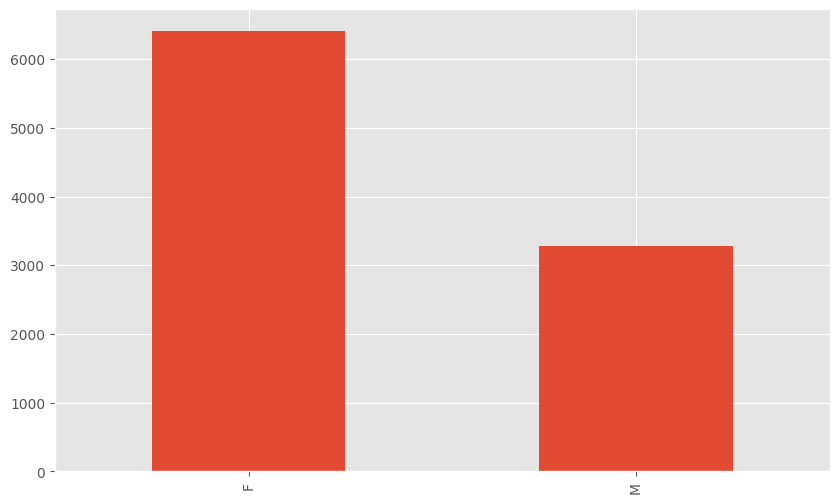

In [43]:
#One line of code to plot bar plot
data_train["CODE_GENDER"].value_counts().plot.bar()

[6406 3286] ['F', 'M']


<BarContainer object of 2 artists>

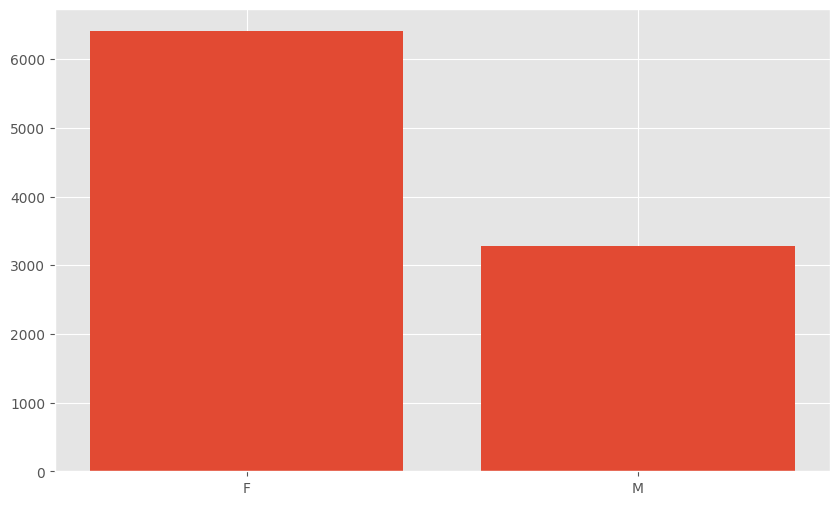

In [44]:
gen_typ = data_train["CODE_GENDER"].value_counts()
gen_typ_vals = gen_typ.values
gen_typ_idx =  gen_typ.index.tolist()
print(gen_typ_vals, gen_typ_idx)
plt.bar(gen_typ_idx, gen_typ_vals)

<ipython-input-46-478c1c8a61cc>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x/100) for x in vals])


Text(0, 0.5, '% of repaid/defaulted loans')

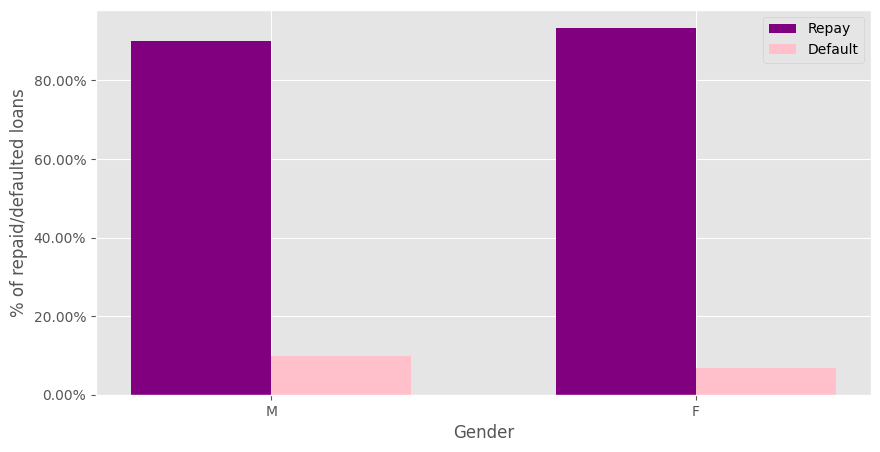

In [46]:
repay = []
default = []
gender = data_train["CODE_GENDER"].unique()
for g in gender:
    default.append(data_train[(data_train["CODE_GENDER"]==g) & (data_train["TARGET"]==1)].shape[0]/data_train[(data_train["CODE_GENDER"]==g)].shape[0] * 100)
    repay.append(data_train[(data_train["CODE_GENDER"]==g) & (data_train["TARGET"]==0)].shape[0]/data_train[(data_train["CODE_GENDER"]==g)].shape[0] * 100)

fig, ax = plt.subplots(figsize=(10,5))
pos = list(range(len(gender)))
width = 0.33
plt.bar(pos, repay, width, color='purple')
plt.bar([p+width for p in pos], default, width, color='pink')
plt.legend(["Repay", "Default"])

#X-axis manipulations
ax.set_xticks([p+0.5*width for p in pos])
ax.set_xticklabels(list(gender))
ax.set_xlabel('Gender')

#Y-axis manipulations
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x/100) for x in vals])
ax.set_ylabel('% of repaid/defaulted loans')


<ipython-input-47-cc0e16644e86>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x/100) for x in vals])


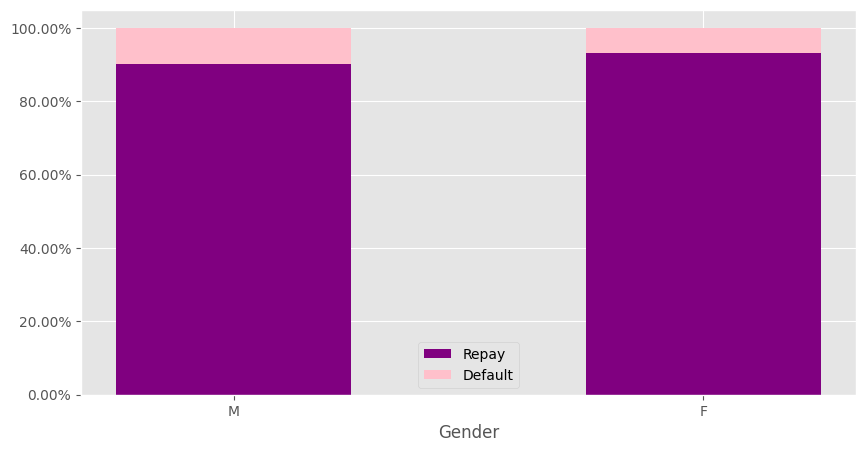

In [47]:
repay = []
default = []
gender = data_train["CODE_GENDER"].unique()
for g in gender:
    default.append(data_train[(data_train["CODE_GENDER"]==g) & (data_train["TARGET"]==1)].shape[0]/data_train[(data_train["CODE_GENDER"]==g)].shape[0] * 100)
    repay.append(data_train[(data_train["CODE_GENDER"]==g) & (data_train["TARGET"]==0)].shape[0]/data_train[(data_train["CODE_GENDER"]==g)].shape[0] * 100)

fig, ax = plt.subplots(figsize=(10,5))
pos = list(range(len(gender)))
width = 0.5
plt.bar(pos, repay, width=width, color='purple', label='Repay')
plt.bar(pos, default, width=width, bottom=repay, color='pink', label='Default')
plt.legend(["Repay", "Default"])

ax.set_xticks([p for p in pos])
ax.set_xticklabels(list(gender))
ax.set_xlabel('Gender')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x/100) for x in vals])
plt.show()

# **Exploring NAME_INCOME_TYPE variable (Perils of blindly trusting graphs)**

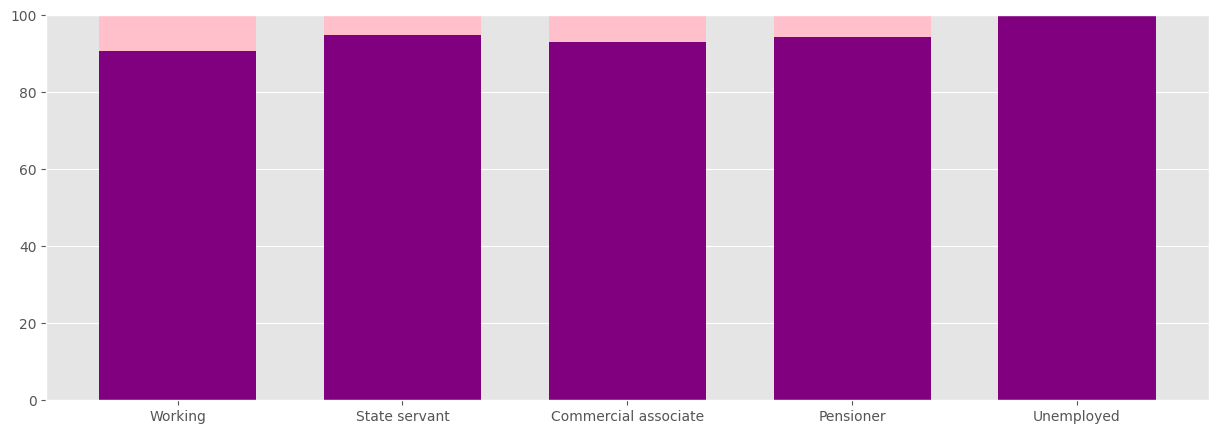

In [48]:
repay = []
default = []
inc_typ = data_train["NAME_INCOME_TYPE"].unique()
for g in inc_typ:
    default.append(data_train[(data_train["NAME_INCOME_TYPE"]==g) & (data_train["TARGET"]==1)].shape[0]/data_train[(data_train["NAME_INCOME_TYPE"]==g)].shape[0] * 100)
    repay.append(data_train[(data_train["NAME_INCOME_TYPE"]==g) & (data_train["TARGET"]==0)].shape[0]/data_train[(data_train["NAME_INCOME_TYPE"]==g)].shape[0] * 100)
    
fig,ax = plt.subplots(figsize=(15,5))
width = 0.7
pos = list(range(len(repay)))
plt.bar(pos, repay, width=width, color='purple')
plt.bar(pos, default, width=width, bottom=repay, color='pink', label='Default')
ax.set_xticks([p for p in pos])
ax.set_xticklabels(inc_typ)
plt.show()

<Axes: >

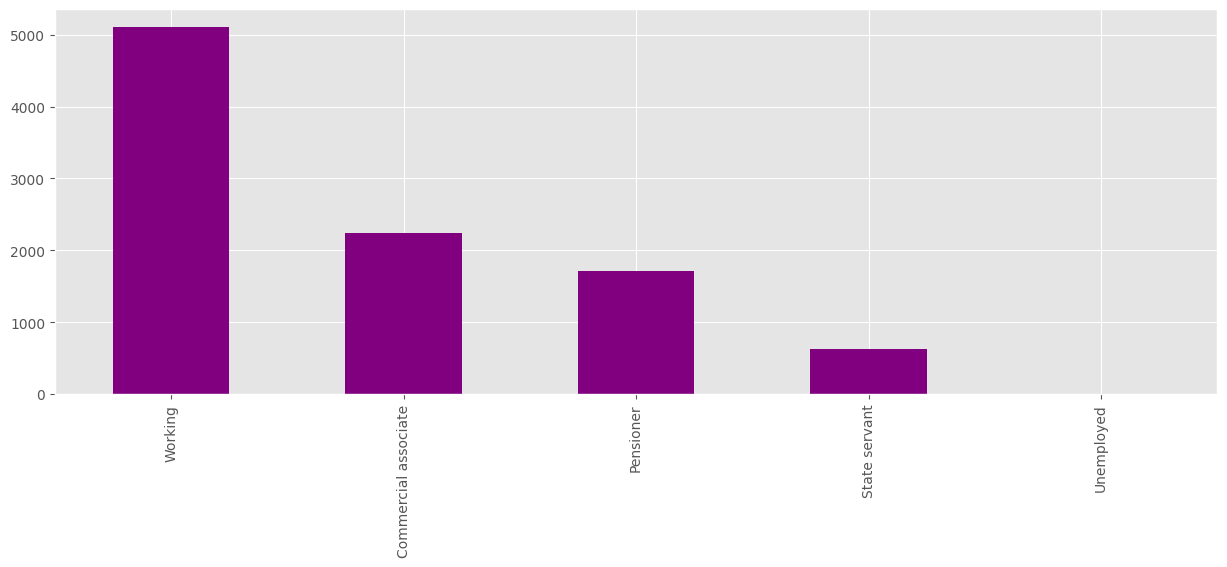

In [49]:
fig,ax = plt.subplots(figsize=(15,5))
inc_type = data_train["NAME_INCOME_TYPE"].value_counts()
inc_type.plot.bar(color='purple')

In [50]:
inc_type

Working                 5099
Commercial associate    2240
Pensioner               1717
State servant            634
Unemployed                 2
Name: NAME_INCOME_TYPE, dtype: int64